In [20]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
import torch.optim as optim
import numpy as np
from torch.onnx.symbolic_opset9 import tensor

from src.config import PROCESSED_DATA_DIR
import matplotlib.pyplot as plt

from src.config import batch_size, image_size, nc, nz, ngf, ndf, num_epochs, lr, beta1, ngpu

In [21]:
dataset = datasets.ImageFolder(
    root=PROCESSED_DATA_DIR,
    transform=transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
    ])
)

In [22]:
tensor_image = dataset[0][0]
tensor_image

tensor([[[ 0.4353,  0.5216,  0.5686,  ...,  0.7098,  0.6392,  0.5373],
         [ 0.4667,  0.4902,  0.5216,  ...,  0.7333,  0.6706,  0.5686],
         [ 0.4510,  0.4431,  0.4588,  ...,  0.7804,  0.7176,  0.6392],
         ...,
         [ 0.3098,  0.4745,  0.5216,  ...,  0.1765,  0.1294,  0.0824],
         [ 0.2627,  0.5373,  0.5373,  ...,  0.0902,  0.1137,  0.0510],
         [ 0.2078,  0.4902,  0.5843,  ..., -0.0353, -0.0196, -0.0510]],

        [[ 0.4196,  0.5137,  0.5608,  ...,  0.6235,  0.5294,  0.4275],
         [ 0.4431,  0.4824,  0.5137,  ...,  0.6471,  0.5608,  0.4588],
         [ 0.4431,  0.4431,  0.4667,  ...,  0.6863,  0.6157,  0.5294],
         ...,
         [ 0.1843,  0.3725,  0.4431,  ..., -0.3647, -0.4667, -0.5451],
         [ 0.1373,  0.4196,  0.4510,  ..., -0.2863, -0.2863, -0.3804],
         [ 0.0745,  0.3647,  0.4745,  ..., -0.2863, -0.2863, -0.3333]],

        [[ 0.1294,  0.2314,  0.3176,  ...,  0.4431,  0.3333,  0.2157],
         [ 0.2000,  0.2471,  0.3020,  ...,  0

In [23]:
import io
import base64 

def tensor_to_base64(tensor_image):
    # Move to CPU if on GPU
    tensor_image = tensor_image.detach().cpu()

    # Remove batch dimension if present
    if tensor_image.dim() == 4 and tensor_image.size(0) == 1:
        tensor_image = tensor_image[0]

    # Convert from [-1, 1] to [0, 1] range if needed
    if tensor_image.min() < 0:
        tensor_image = (tensor_image + 1) / 2.0

    # Ensure values are clamped between 0 and 1
    tensor_image = torch.clamp(tensor_image, 0, 1)

    # Convert to PIL Image (automatically handles permute)
    pil_image = transforms.ToPILImage()(tensor_image)

    # Save to bytes buffer
    buffer = io.BytesIO()
    pil_image.save(buffer, format="PNG")
    buffer.seek(0)

    # Convert to base64 string
    img_str = base64.b64encode(buffer.getvalue()).decode('utf-8')

    return img_str

In [24]:
image_base64 = tensor_to_base64(tensor_image)

In [25]:
with open('sample_image.txt', 'w') as f:
    f.write(image_base64)

In [51]:
dataset = datasets.ImageFolder(
    root=PROCESSED_DATA_DIR,
)

In [52]:
image = dataset[0][0]

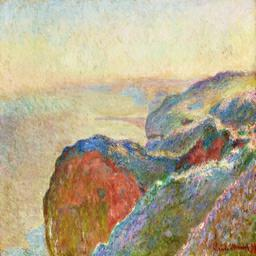

In [53]:
image

In [54]:
dataset = datasets.ImageFolder(
    root=PROCESSED_DATA_DIR,
    transform=transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [55]:
tensor_image = dataset[0][0]

In [57]:
image_base64 = tensor_to_base64(tensor_image)

In [58]:
with open('sample_image.txt', 'w') as f:
    f.write(image_base64)

In [56]:
tensor_image.shape

torch.Size([3, 256, 256])

In [47]:
for i in range(30):
    tensor_image = dataset[i][0]
    print(tensor_image.shape)

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
